# Compressione

## Definizione dei parametri

- $F$ : **Dimensione** dei **macro-blocchi** in cui suddividere l'immagine;
- $d ∈ ℕ : 0 ≤ d ≤ 2F - 1 $ : **Soglia di taglio delle frequenze**.

## Formato

Le *entry* vengono salvate in un **vettore monodimensionale** che segue la visita
- $Left → Right$
- $Top → Down$

della matrice. Per esempio, dati $F = 6$ e $d = 5$, **la matrice**

\begin{bmatrix}
1 & 2 & 3 & 4 & 5 & - \\
6 & 7 & 8 & 9 & - & - \\
10 & 11 & 12 & - & - & - \\
13 & 14 & - & - & - & - \\
15 & - & - & - & - & - \\
- & - & - & - & - & - \\
\end{bmatrix}

viene salvata come il **vettore**

\begin{bmatrix}
1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 & 11 & 12 & 13 & 14 & 15
\end{bmatrix}

## Numero di entrate mantenute

Il **numero di entry** che vengono mantenute è:
- Per $ 0 ≤ d ≤ F$:

\begin{equation}
n = ∑_{i=0}^{d-1}{i+1} = ∑_{i=1}^{d}{i} = \frac{d(d+1)}{2}
\end{equation}

- Per $ F < d ≤ 2F - 1$:

\begin{equation}
n = \frac{F(F+1)}{2} + ∑_{k=1}^{d-F}{F-k}
\end{equation}

dove

\begin{align}
  ∑_{k=1}^{d-F}{F-k} &= ∑_{k=1}^{d-F}{F} - ∑_{k=1}^{d-F}{k} = \\
                     &= F(d - F) - \frac{(d - F)(d - F + 1)}{2} = \\
                     &= Fd - F^2 - \frac{1}{2}d^2 + \frac{1}{2}Fd - \frac{1}{2}d + \frac{1}{2}Fd - \frac{1}{2}F^2 + \frac{1}{2}F = \\
                     &= -\frac{3}{2}F^2 + \frac{1}{2}F + 2Fd - \frac{1}{2}d^2 - \frac{1}{2}d
\end{align}

e di conseguenza

\begin{align}
n &= \frac{1}{2}F^2 + \frac{1}{2}F - \frac{3}{2}F^2 + \frac{1}{2}F + 2Fd - \frac{1}{2}d^2 - \frac{1}{2}d = \\
  &= 2Fd - \frac{1}{2}d^2 - F^2 - \frac{1}{2}d + F
\end{align}

Riassumendo:

\begin{equation}
n(F, d) = \begin{cases}
          \frac{d(d+1)}{2} & \text{se } 0 ≤ d ≤ F \\
          2Fd - \frac{1}{2}d^2 - F^2 - \frac{1}{2}d + F & \text{se } F < d ≤ 2F - 1
        \end{cases}
\end{equation}

## Spazio salvato

La percentuale di **spazio salvato** è data da:

\begin{equation}
δ(F, d) = \frac{F^2 - n}{F^2} = 1 - \frac{n}{F^2}
\end{equation}

che vale

- $0 < d ≤ F$:
\begin{equation}
δ(F, d) = 1 - \frac{d(d+1)}{2F^2}
\end{equation}

- $ F < d ≤ 2F - 1$:
\begin{equation}
δ(F, d) = 1 - \frac{4Fd - d^2 - 2F^2 - d + 2F}{2F^2} = 2 - \frac{4Fd - d^2 - d + 2F}{2F^2}
\end{equation}

In [2]:
def delta(F, d):
  assert 0 <= d <= 2*F - 1, f'd={d} out of domain for F={F}'
  if d <= F:
    return 1 - d * (d + 1) / (2 * F*F)
  else:
    return 1 - (4*F*d - d*d - 2*F*F - d + 2*F) / (2 * F*F)

## Esempio

In [3]:
import matplotlib.pyplot as plt

Fissando $F = 8$ (come per il **formato** ***JPG***), si ottiene:

\begin{equation}
δ_{8}(d) = \begin{cases}
          \frac{-d^2 - d + 128}{128} & \text{se } 0 ≤ d ≤ 8 \\
          \frac{d^2 - 31d + 368}{128} & \text{se } 8 < d ≤ 15
        \end{cases}
\end{equation}

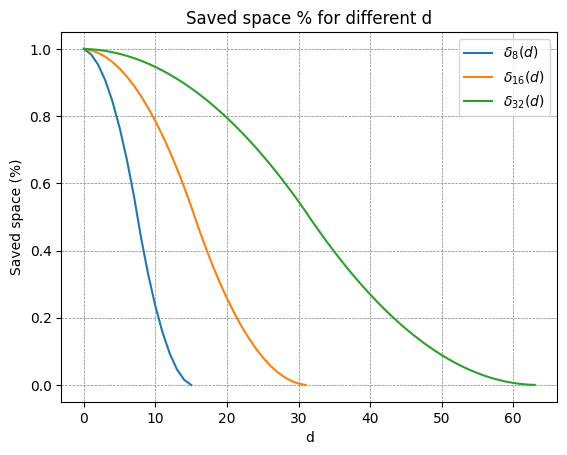

In [9]:
F_ = (8, 16, 32)

x_ = [[i for i in range(2*F)] for F in F_]

y_ = [[delta(F_[i], x_i) for x_i in x] for i, x in enumerate(x_)]

for i, F in enumerate(F_):
  plt.plot(x_[i], y_[i], label=r"$\delta_{" + f'{F}' + "}(d)$")

plt.title('Saved space % for different d')
plt.xlabel('d')
plt.ylabel('Saved space (%)')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()

plt.show()